# System3_comparison.ipynb

JRM33モデルのフットプリント位置予測を用いる。

### 衛星のSystem III経度に対して、フットプリント位置予測をプロットする。

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import B_JRM33 as BJRM

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })

In [2]:
satovalN = np.recfromtxt('data/JRM33/satellite_foot_N.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

satovalS = np.recfromtxt('data/JRM33/satellite_foot_S.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

In [3]:
# EFP見えている
OBS_s3moonN = np.array([
    150,113,103,181
])

OBS_s3efpN = np.array([
    161,147,144,174
])

OBS_s3moonS = np.array([
    104,82,100
])

OBS_s3efpS = np.array([
    84,71,82
])

# EFP見えなかった
NO_s3moonN = np.array([
    278,169,206,222,200,206,194,239,201
])

NO_s3efpN = np.array([
    234,169,186,194,183,186,178,205,184
])

NO_s3moonS = np.array([
    320,345,335,331
])

NO_s3efpS = np.array([
    335,352,347,344
])

In [12]:
RJ = 71492E+3           # JUPITER RADIUS [m]
r = 9.4*RJ
theta = np.radians(90)
phi = np.radians(np.linspace(0,360,60))
B = np.zeros(phi.shape)
for i in range(phi.size):
    Bvec = BJRM.B().JRM33(r, theta, phi[i])
    B[i] = np.sqrt(Bvec[0]**2+Bvec[1]**2+Bvec[2]**2)


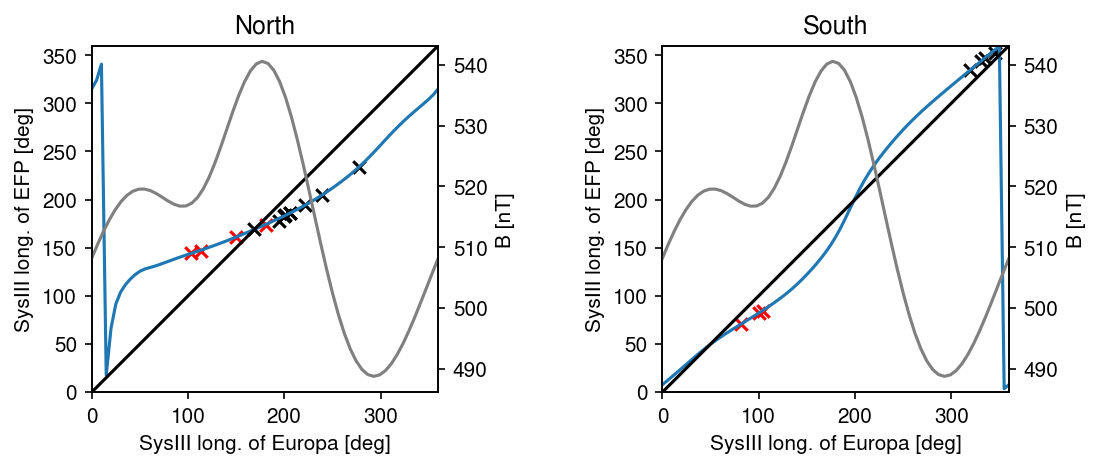

In [25]:
fig, ax = plt.subplots(1,2,figsize=(9,3),dpi=150)
# ax[0].set_aspect('equal')
ax[0].set_title('North')
ax[0].set_xlabel('SysIII long. of Europa [deg]')
ax[0].set_ylabel('SysIII long. of EFP [deg]')
ax[0].set_xlim(0,360)
ax[0].set_ylim(0,360)
ax[0].plot(satovalN.wlon, satovalN.euwlon)
for i in range(OBS_s3moonN.size):
    ax[0].scatter(OBS_s3moonN[i], OBS_s3efpN[i], marker='x', color='r')
for i in range(NO_s3moonN.size):
    ax[0].scatter(NO_s3moonN[i], NO_s3efpN[i], marker='x', color='k')
ax[0].plot(np.arange(0,360+1,5),np.arange(0,360+1,5), color='k')
ax1 = ax[0].twinx()
ax1.set_ylabel('B [nT]')
ax1.plot(np.degrees(2*np.pi-phi),B, color='gray')
ax[0].set_box_aspect(1)

ax[1].set_aspect('equal')
ax[1].set_title('South')
ax[1].set_xlabel('SysIII long. of Europa [deg]')
ax[1].set_ylabel('SysIII long. of EFP [deg]')
ax[1].set_xlim(0,360)
ax[1].set_ylim(0,360)
ax[1].plot(satovalS.wlon, satovalS.euwlon)
for i in range(OBS_s3moonS.size):
    ax[1].scatter(OBS_s3moonS[i], OBS_s3efpS[i], marker='x', color='r')
for i in range(NO_s3moonS.size):
    ax[1].scatter(NO_s3moonS[i], NO_s3efpS[i], marker='x', color='k')
ax[1].plot(np.arange(0,360+1,5),np.arange(0,360+1,5), color='k')
ax1 = ax[1].twinx()
ax1.set_ylabel('B [nT]')
ax1.plot(np.degrees(2*np.pi-phi),B, color='gray')
ax[1].set_box_aspect(1)

plt.show()

北半球 ... EuropaのSys3経度がEFPモデル(JRM33)よりも先行している場合に発光あり

南半球 ... EuropaのSys3経度がEFPモデル(JRM33)よりも遅延している場合に発光あり

メモ: 磁気緯度もプロットしたら何か見えるかもしれない。磁気緯度はどうやって計算する？

→ JRM33モデルの$\theta$と$\phi$は地理座標でOKなので、Europaの位置は$(r,\ \theta,\ \phi)=(9.4 R_J,\ 0,\ \lambda_{\rm III})$でOK。

Deimosで計算しよう。。。